##POSTTEST 5
###Surya Abdi Febrianto
2209106074


### 1. Instalasi TensorFlow
Instal TensorFlow untuk memanfaatkan API Keras.
```python
!pip install tensorflow



### 2. Import Library yang Diperlukan
Impor semua library yang dibutuhkan.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### 3. Membaca Dataset
Membaca file CSV


In [9]:
df = pd.read_csv('StudentsPerformance.csv')



### 4. Pra-pemrosesan Data
- Encode data kategorikal.
- Pisahkan fitur dan target.
- Standarisasi data.

In [10]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])

X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df[['math score', 'reading score', 'writing score']].mean(axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)


### 5. Memisahkan Data
Pisahkan data menjadi set pelatihan dan validasi.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



### 6. Membuat Model Sequential
Buat model neural network sederhana.

In [12]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regresi
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7. Mengkompilasi dan Melatih Model
Kompilasi model dan latih dengan data pelatihan.

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4748.9707 - mae: 67.4182 - val_loss: 4467.6558 - val_mae: 65.2031
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4611.7656 - mae: 66.2772 - val_loss: 4272.7798 - val_mae: 63.6746
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4452.5186 - mae: 65.1651 - val_loss: 3933.0986 - val_mae: 60.9172
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3997.0991 - mae: 61.3797 - val_loss: 3404.5247 - val_mae: 56.3549
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3515.4707 - mae: 57.4647 - val_loss: 2671.9346 - val_mae: 49.3755
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2746.2834 - mae: 50.0369 - val_loss: 1829.1670 - val_mae: 40.0132
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1828.8088 - mae: 39.8450 - val_loss: 1040.3485 - val_mae: 28.8426
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 990.6974 - mae: 27.9149 - val_loss: 494.5542 - val_mae: 18.8944
Epoch 9/5

### 8. Mengevaluasi Model
Evaluasi model dengan data pelatihan dan validasi.

In [14]:
train_loss, train_mae = model.evaluate(X_train, y_train)
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f'Training MAE: {train_mae:.2f}, Validation MAE: {val_mae:.2f}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.4342 - mae: 10.1986 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 225.4897 - mae: 11.4698 
Training MAE: 10.03, Validation MAE: 11.17


### 9. Menghitung dan Menampilkan Akurasi
Hitung akurasi berdasarkan ambang batas yang ditetapkan.

In [16]:
y_pred = model.predict(X_val)
threshold = 50  # Ambang batas
y_pred_class = (y_pred >= threshold).astype(int)
y_val_class = (y_val >= threshold).astype(int)

accuracy = np.mean(y_pred_class.flatten() == y_val_class.values.flatten()) * 100
print(f'Akurasi Validasi: {accuracy:.2f}%')

# Memeriksa syarat akurasi
if accuracy >= 70:
    print("Akurasi Validasi sudah memenuhi syarat ")
else:
    print("Akurasi Validasi belum memenuhi syarat ")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Akurasi Validasi: 86.50%
Akurasi Validasi sudah memenuhi syarat 


### 10. Visualisasi Hasil
Visualisasikan hasil MAE selama pelatihan.

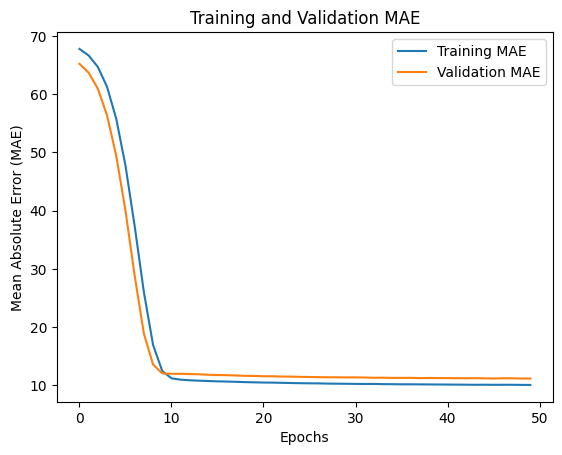

In [17]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()
